## Naive Bayes Classification_Salary Data

In [1]:
## Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

In [2]:
## Reading Train DataSet
data_train = pd.read_csv('SalaryData_Train.csv')
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data_train.shape

(30161, 14)

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
data_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [6]:
for x in data_train.columns:
    print('---- %s ---' % x)
    print(data_train[x].value_counts())

---- age ---
36    852
31    851
33    837
34    836
35    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 72, dtype: int64
---- workclass ---
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
---- education ---
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
---- educationno ---
9     9840
10    6677
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name:

In [7]:
cat_variable = [var for var in data_train.columns if data_train[var].dtype == 'O']
print(cat_variable)

['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [8]:
for var in cat_variable:
    print(var, 'contains', len(data_train[var].unique()), 'labels')

workclass contains 7 labels
education contains 16 labels
maritalstatus contains 7 labels
occupation contains 14 labels
relationship contains 6 labels
race contains 5 labels
sex contains 2 labels
native contains 40 labels
Salary contains 2 labels


In [9]:
num_variable = [var for var in data_train.columns if data_train[var].dtype != 'O']
print(num_variable)

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [10]:
## Reading Test Dataset
data_test = pd.read_csv('SalaryData_Test.csv')
data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [11]:
data_test.shape

(15060, 14)

In [12]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [13]:
data_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [14]:
pd.set_option('display.max_rows', 100)
for x in data_test.columns:
    print('---- %s ---' % x)
    print(data_test[x].value_counts())

---- age ---
35    444
33    442
36    431
31    423
38    420
23    417
32    407
41    405
30    402
37    401
34    398
28    390
29    383
39    383
40    379
24    378
42    372
27    368
22    360
47    355
46    351
26    347
45    343
25    334
44    331
43    322
21    314
48    292
20    287
19    270
51    264
49    255
50    254
18    248
52    245
53    241
56    191
54    190
55    188
57    177
58    173
17    165
59    156
61    135
60    122
62    115
64    112
63     94
65     81
66     70
67     69
68     46
72     43
69     36
71     36
73     33
70     32
74     21
75     19
77     19
76     17
81     14
80     13
90     11
78      7
79      5
83      4
82      3
88      2
85      2
89      1
84      1
87      1
Name: age, dtype: int64
---- workclass ---
 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: i

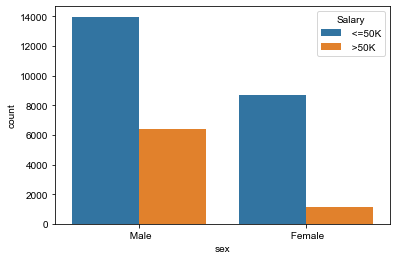

In [15]:
sns.countplot(x ='sex', hue ='Salary', data = data_train)
sns.set(rc = {'figure.figsize': (20,5)})

C:\Users\rayad\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

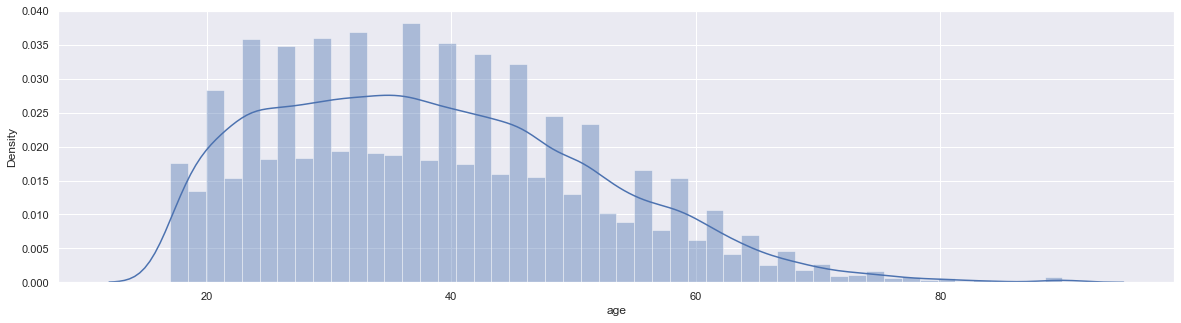

In [16]:
sns.distplot(data_train['age'])

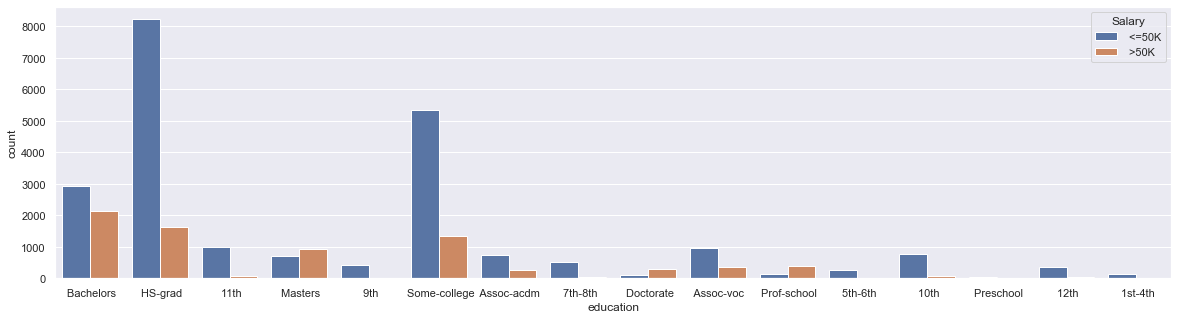

In [17]:
sns.countplot(x ='education', hue ='Salary', data = data_train)
sns.set(rc = {'figure.figsize': (20,5)})

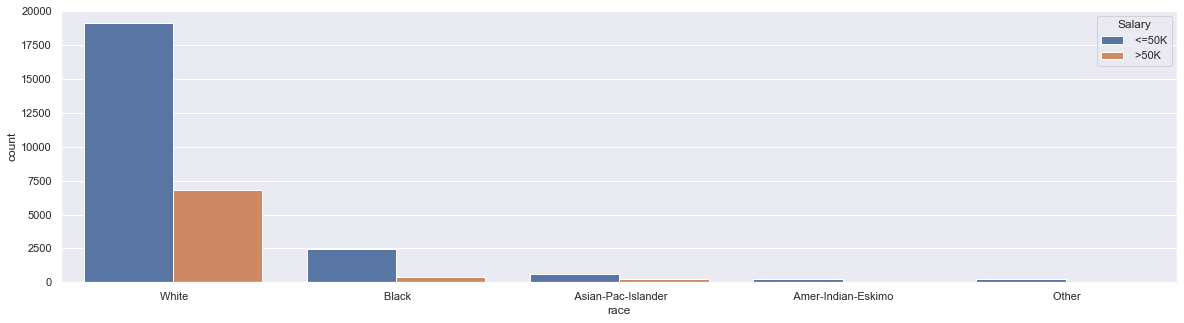

In [18]:
sns.countplot(x ='race', hue ='Salary', data = data_train)
sns.set(rc = {'figure.figsize': (20,5)})

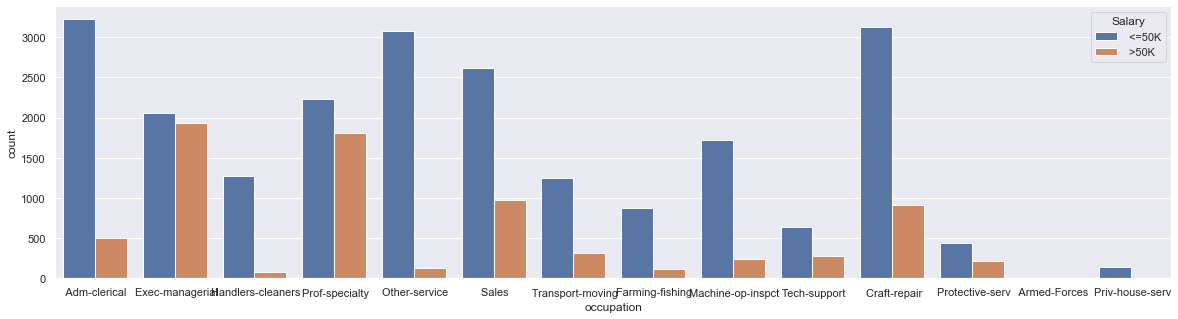

In [19]:
sns.countplot(x ='occupation', hue ='Salary', data = data_train)
sns.set(rc = {'figure.figsize': (25,5)})

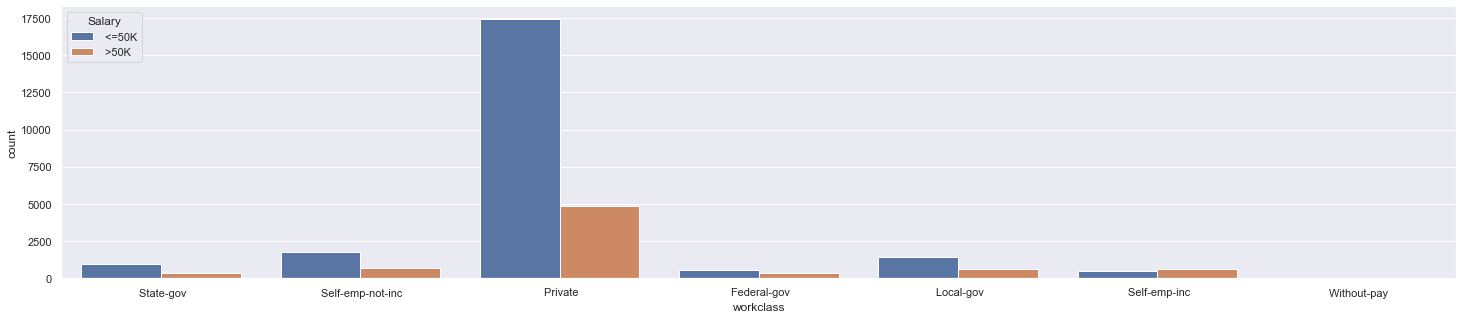

In [20]:
sns.countplot(x ='workclass', hue ='Salary', data = data_train)
sns.set(rc = {'figure.figsize': (20,5)})

In [21]:
## Splitting Train Data into X and Y varialbes
X_train = data_train.iloc[:, 0:13]
Y_train = data_train.iloc[:, 13]
Y_train.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: Salary, dtype: object

In [22]:
X_train_final = pd.get_dummies(X_train)
X_train_final.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
## Splitting Test Data into X and Y variables
X_test = data_test.iloc[:, 0:13]
Y_test = data_test.iloc[:, 13]
Y_test.head()

0     <=50K
1     <=50K
2      >50K
3      >50K
4     <=50K
Name: Salary, dtype: object

In [24]:
X_test_final = pd.get_dummies(X_test)
X_test_final.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
cols_train = X_train_final.columns
cols_test = X_test_final.columns

In [26]:
scalar = RobustScaler()

X_train_final = scalar.fit_transform(X_train_final)
X_test_final = scalar.fit_transform(X_test_final)


In [27]:
X_train_final = pd.DataFrame(X_train_final, columns= cols_train)
X_train_final.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,0.105263,0.75,2174.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.684211,0.75,0.0,0.0,-5.4,0.0,0.0,-1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.052632,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.842105,-0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.473684,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0


In [28]:
X_test_final = pd.DataFrame(X_test_final, columns= cols_test)
X_test_final.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,-0.60,-0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.05,-0.25,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.45,0.50,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.35,0.00,7688.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.15,-1.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Gaussian Naive Bayes Model

In [29]:
from sklearn.naive_bayes import GaussianNB as GB
classifier_gb = GB()
model = classifier_gb.fit(X_train_final, Y_train)

In [30]:
y_pred_train = model.predict(X_train_final)
y_pred_train

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [31]:
y_pred_test = model.predict(X_test_final)
y_pred_test

array([' <=50K', ' <=50K', ' >50K', ..., ' >50K', ' >50K', ' >50K'],
      dtype='<U6')

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [33]:
print('Model Accuracy score: {0:0.2f}'.format(accuracy_score(Y_test, y_pred_test)*100))

Model Accuracy score: 80.02


In [34]:
print('Model Accuracy score: {0:0.2f}'.format(accuracy_score(Y_train, y_pred_train)*100))

Model Accuracy score: 80.14


In [35]:
Y_test.value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [36]:
null_accuracy = (11360/(11360+3700)*100)
null_accuracy

75.4316069057105

In [37]:
cm = confusion_matrix(Y_test, y_pred_test)
print('Confusion Matrix\n', cm)
print('\nTrue Positive(TP) = ', cm[0,0])
print('\nFalse Positive(FP) = ', cm[0,1])
print('\nFalse Negative(FN) = ', cm[1,0])
print('\nTrue Negative(TN) = ', cm[1,1])

Confusion Matrix
 [[9024 2336]
 [ 673 3027]]

True Positive(TP) =  9024

False Positive(FP) =  2336

False Negative(FN) =  673

True Negative(TN) =  3027


In [38]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                         index = ['Predicted Positive:1', 'Predicted Negative:0'])

<AxesSubplot:>

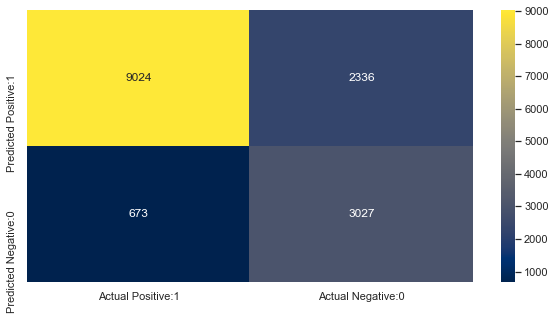

In [39]:
plt.figure(figsize=(10,5))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='cividis')

In [40]:
y_pred_prob = model.predict_proba(X_test_final)[:, 1]
y_pred_prob

array([1.51971950e-10, 2.88772935e-01, 9.73596934e-01, ...,
       9.97734126e-01, 9.91916917e-01, 9.99963038e-01])

#### Multinomial Naive Bayes Model

In [41]:
def normal(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [42]:
X_train_norm = normal(X_train_final)
X_test_norm = normal(X_test_final)
X_test_norm

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,0.109589,0.400000,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.287671,0.533333,0.000000,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.150685,0.733333,0.000000,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.369863,0.600000,0.076881,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.232877,0.333333,0.000000,0.0,0.295918,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.219178,0.800000,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15056,0.301370,0.800000,0.000000,0.0,0.357143,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15057,0.287671,0.800000,0.000000,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15058,0.369863,0.800000,0.054551,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [43]:
from sklearn.naive_bayes import MultinomialNB as MB
classifier_mb = MB()

In [44]:
model2 = classifier_mb.fit(X_train_norm, Y_train)

In [45]:
y_pred_train_mb = model2.predict(X_train_norm)
y_pred_train_mb

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [46]:
y_pred_test_mb = model2.predict(X_test_norm)
y_pred_test_mb

array([' <=50K', ' <=50K', ' >50K', ..., ' >50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [47]:
print('Model Accuracy score: {0:0.2f}'.format(accuracy_score(Y_test, y_pred_test_mb)*100))

Model Accuracy score: 79.46


In [48]:
print('Model Accuracy score: {0:0.2f}'.format(accuracy_score(Y_train, y_pred_train_mb)*100))

Model Accuracy score: 79.29


In [49]:
cm_mb = confusion_matrix(Y_test, y_pred_test_mb)
print('Confusion Matrix\n', cm_mb)
print('\nTrue Positive(TP) = ', cm_mb[0,0])
print('\nFalse Positive(FP) = ', cm_mb[0,1])
print('\nFalse Negative(FN) = ', cm_mb[1,0])
print('\nTrue Negative(TN) = ', cm_mb[1,1])

Confusion Matrix
 [[9199 2161]
 [ 932 2768]]

True Positive(TP) =  9199

False Positive(FP) =  2161

False Negative(FN) =  932

True Negative(TN) =  2768


In [50]:
cm_matrix = pd.DataFrame(data=cm_mb, columns=['Actual Positive:1', 'Actual Negative:0'], 
                         index = ['Predicted Positive:1', 'Predicted Negative:0'])

<AxesSubplot:>

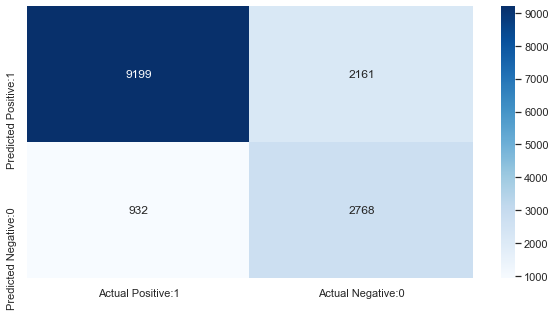

In [51]:
plt.figure(figsize=(10,5))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')